In [1]:
# Data Preparation
import pandas as pd 

Automobile = pd.read_csv('Automobile.csv', sep='#', header = None, names = 
                         ['symboling', 
                          'normalized-losses',
                          'make', 'fuel-type', 
                          'aspiration', 
                          'num-of-doors', 
                          'body-style', 
                          'drive-wheels', 
                          'engine-location', 
                          'wheel-base', 'length', 
                          'width', 'height',
                          'curb-weight', 
                          'engine-type', 
                          'num-of-cylinders',
                          'engine-size',
                          'fuel-system',
                          'bore',
                          'stroke',
                          'compression-ratio',
                          'horsepower',
                          'peak-rpm',
                          'city-mpg',
                          'highway-mpg',
                          'price'])

# checking whether the loaded data is equivalent to the data in the source CSV file
Automobile.describe() # only shows numerical values
Automobile.describe(include = 'all') # sanity checks, price should be 5118 to 45400
Automobile.info() # see NA's

# Findings:
# 4 should be removed in symboling
# Should not be automobiles with price 0
# Normalised losses should be from 65 to 256

# checking for typos, difference in case and white space
Automobile["make"].value_counts() # 'vol00112ov' needs changing
Automobile["fuel-type"].value_counts()
Automobile["aspiration"].value_counts() # 'turrrrbo' needs changing
Automobile["num-of-doors"].value_counts() # 'fourr' needs changing
Automobile["body-style"].value_counts() 
Automobile["drive-wheels"].value_counts() 
Automobile["engine-location"].value_counts() 
Automobile["engine-type"].value_counts() 
Automobile["num-of-cylinders"].value_counts() 
Automobile["fuel-system"].value_counts() 
Automobile["body-style"].value_counts() 

# Converting all strings to lower case and removing extra white space
Automobile[["make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system"]] = Automobile[["make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system"]].transform(lambda x: x.str.lower().str.strip())

# Fix incorrect data
Automobile.aspiration = Automobile.aspiration.str.replace("turrrrbo", "turbo") # Changing turrrrbo to turbo
Automobile["num-of-doors"] = Automobile["num-of-doors"].str.replace("fourr", "four") # Changing fourr to four
Automobile["make"] = Automobile["make"].str.replace("vol00112ov", "volvo") # Changing vol00112ov to volvo
Automobile['symboling'] = Automobile['symboling'].replace(4, None) # insurance rating of 4 does not exist and needs to corrected


# Remove the errors where normalised losses is shown as 25
Automobile[Automobile['normalized-losses'] == 25] 
x = [205, 218, 231]
Automobile = Automobile.drop(x)

# Fix values where price = 0 (more concerned about incorrect data than null)
Automobile['price'].mean() # with 0s the average price is 13696.08
Automobile[Automobile['price'] == 0] # finding index of 0s
zeros = [210, 211, 223, 224, 236, 237]
Automobile2 = Automobile.drop(zeros) # the rows were dropped in a new dataframe so that they are not lost in the original
Automobile2['price'].mean() # average price is 14056.50 when the 0s are not inflating the mean
Automobile['price'] = Automobile['price'].replace(0, 14056.50)  # impute zero with true mean

# check dataset again
Automobile.describe(include = 'all') 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 26 columns):
symboling            238 non-null int64
normalized-losses    191 non-null float64
make                 238 non-null object
fuel-type            238 non-null object
aspiration           238 non-null object
num-of-doors         236 non-null object
body-style           238 non-null object
drive-wheels         238 non-null object
engine-location      238 non-null object
wheel-base           238 non-null float64
length               238 non-null float64
width                238 non-null float64
height               238 non-null float64
curb-weight          238 non-null int64
engine-type          238 non-null object
num-of-cylinders     238 non-null object
engine-size          238 non-null int64
fuel-system          238 non-null object
bore                 234 non-null float64
stroke               234 non-null float64
compression-ratio    238 non-null float64
horsepower           236 non-

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,235.000000,188.000000,235,235,235,233,235,235,235,235.000000,...,235.000000,235,231.000000,231.000000,235.000000,233.000000,233.000000,235.000000,235.000000,231.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,volvo,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,41,207,175,144,124,120,232,NaN,...,NaN,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.600000,118.329787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.036170,...,129.429787,NaN,3.355844,3.244329,10.471149,107.064378,5137.553648,24.659574,30.042553,14020.290043
std,1.314612,34.522375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.559948,...,39.683771,NaN,0.288533,0.303118,4.411125,38.527086,458.792951,6.395366,6.720162,7790.934276
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.800000,...,98.000000,NaN,3.150000,3.110000,8.700000,73.000000,4800.000000,19.000000,25.000000,7966.000000
50%,0.000000,106.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.300000,...,122.000000,NaN,3.350000,3.270000,9.000000,101.000000,5200.000000,24.000000,29.000000,11845.000000
75%,1.500000,145.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.700000,...,145.000000,NaN,3.620000,3.400000,9.500000,121.000000,5500.000000,29.000000,34.000000,18050.000000


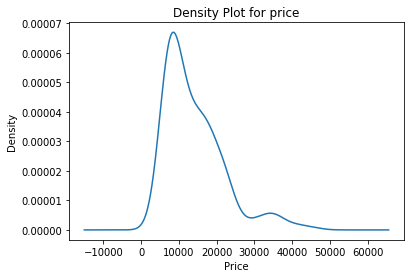

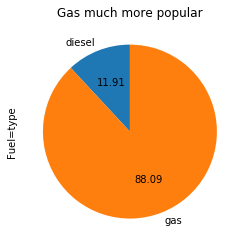

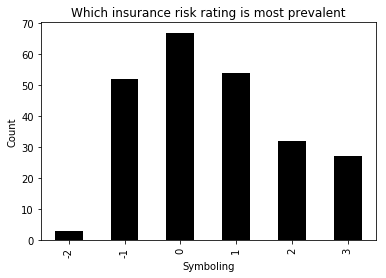

In [5]:
# Data Exploration
# Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values

# numerical value = price
# nominal value = fuel-type
# ordinal value = symboling



import matplotlib.pyplot as plt
import seaborn as sns
# Price
Automobile['price'].plot(kind = 'density')
plt.title('Density Plot for price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


# Fuel type
Automobile_fuel_type = Automobile.groupby('fuel-type') # group by fuel type
Automobile_fuel_type['fuel-type'].count().sort_values()
Automobile_fuel_type['fuel-type'].count().sort_values().plot(kind = 'pie', startangle = 90, autopct = '%.2f') # startangle 90: making sure pie starts at the top
plt.title('Gas much more popular')
plt.ylabel('Fuel=type')
plt.show()

# Gas is the most popular fuel type during this time period


# symboling 
Automobile_cylinders = Automobile.groupby('symboling')
Automobile_cylinders['symboling'].count().sort_values()
Automobile_cylinders['symboling'].count().plot(kind = 'bar', color = 'black')
plt.title('Which insurance risk rating is most prevalent')
plt.ylabel('Count')
plt.xlabel('Symboling')
plt.show()





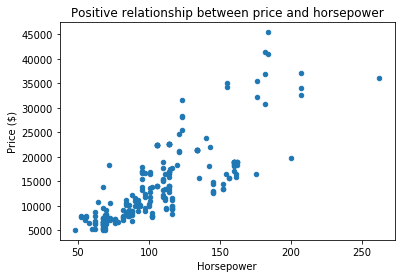

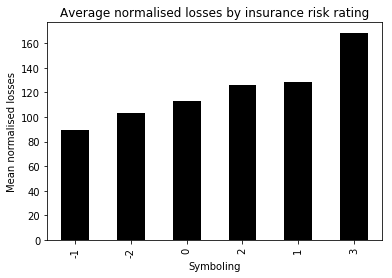

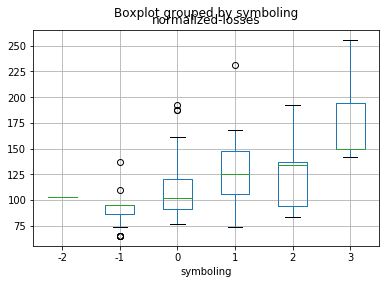

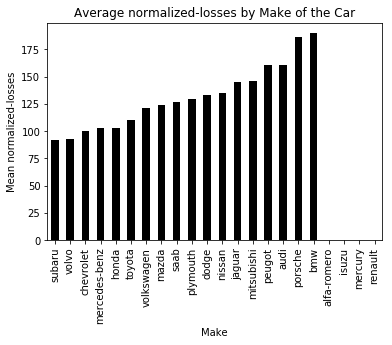

make
chevrolet         6007.000000
dodge             7875.444444
plymouth          7963.428571
honda             8184.692308
subaru            8541.250000
isuzu             8916.500000
mitsubishi        9239.769231
renault           9595.000000
toyota            9885.812500
volkswagen       10077.500000
nissan           10415.666667
mazda            10652.882353
saab             15223.333333
peugot           15489.090909
alfa-romero      15498.333333
mercury          16503.000000
audi             17859.166667
volvo            19091.439024
bmw              26118.750000
porsche          31400.500000
mercedes-benz    33647.000000
jaguar           34600.000000
Name: price, dtype: float64

In [3]:
# Data Exploration
# Exploring the relationships between columns with plausible hypotheses

# Hypothesis 1
# It is hypothesised that horsepower is positive associated with price as a high maxiumum horsepower requires a stronger enginer and thereforce a higher price
Automobile.plot(kind = 'scatter', x = 'horsepower', y = 'price') # price as output. scatter shows there is a positive relationship
plt.title('Positive relationship between price and horsepower')
plt.ylabel('Price ($)')
plt.xlabel('Horsepower')
plt.show()


# Hypothesis 2: it is hypothesised that higher normalised losses create higher insurance risk
Automobile_symboling = Automobile.groupby('symboling')
Automobile_symboling['normalized-losses'].mean().sort_values()
Automobile_symboling['normalized-losses'].mean().sort_values().plot(kind = 'bar', color = 'black')
plt.title('Average normalised losses by insurance risk rating')
plt.ylabel('Mean normalised losses')
plt.xlabel('Symboling')
plt.show()


Automobile.boxplot(column = 'normalized-losses', by = 'symboling')
plt.show()

# Hypothesis 3
# It is hypothesised that cars with less market share in the consumer range such as European luxury cars are more prone to higher normalised losses (the degree to which the auto is more risky than its price indicates). This is because less,production of these cars means there are less parts and less skilled labour people to help maintain them. 
Automobile_make = Automobile.groupby('make')
Automobile_make['normalized-losses'].mean().sort_values()
Automobile_make['normalized-losses'].mean().sort_values().plot(kind = 'bar', color = 'black')
plt.title('Average normalized-losses by Make of the Car')
plt.xlabel('Make') 
plt.ylabel('Mean normalized-losses')
plt.show()

Automobile['make'].value_counts()
# availability and price
Automobile_make['price'].mean().sort_values()